In [2]:
def division(x=90,M=97):
  return abs(x)%M
print(division(30501))
print(division(-30501))
for i in range(10):
  print(i, '=>', division(i))


43
43
0 => 0
1 => 1
2 => 2
3 => 3
4 => 4
5 => 5
6 => 6
7 => 7
8 => 8
9 => 9


In [4]:
def mitad_cuadrado(x=0, k=10, w = 32):
  mask = (1 << k) - 1
  return ((x**2) >> (w - k)) & mask

print(mitad_cuadrado(30501))
print(mitad_cuadrado(30502))
print(mitad_cuadrado(-30501))
for i in range(10):
  print(i, '=>', mitad_cuadrado(i))

221
221
221
0 => 0
1 => 0
2 => 0
3 => 0
4 => 0
5 => 0
6 => 0
7 => 0
8 => 0
9 => 0


In [ ]:
def fibonacci(x=0, k=10, w=32, a=2654435769):
  mask = (1 << k) - 1
  return ((x*a) >> (w - k)) & mask

print(fibonacci(30501))
print(fibonacci(30502))
print(fibonacci(-30501))
for i in range(10):
  print(i, '=>', fibonacci(i))

670
279
353
0 => 0
1 => 632
2 => 241
3 => 874
4 => 483
5 => 92
6 => 725
7 => 334
8 => 966
9 => 575


# Manipulacion de Datos Faltantes


In [1]:
import pandas as pd
from io import StringIO

In [18]:
datos = \
"""A,B,C,D
1.2,2.5,3.9,4.5
5.2,6.8,,8.4
9.1,0.7,1.3,
"""
df = pd.read_csv(StringIO(datos))
df

,A,B,C,D
0,1.2,2.5,3.9,4.5
1,5.2,6.8,NaN,8.4
2,9.1,0.7,1.3,NaN


In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.dropna(axis=1) #deshacer los nodulos por columnas


,A,B
0,1.2,2.5
1,5.2,6.8
2,9.1,0.7


In [8]:
df.dropna(axis=0) #deshacer los nodulos por filas

,A,B,C,D
0,1.2,2.5,3.9,4.5


In [9]:
df.dropna(how='all') # ELimina las muestras en las que todas sus columnas sean NaN

,A,B,C,D
0,1.2,2.5,3.9,4.5
1,5.2,6.8,NaN,8.4
2,9.1,0.7,1.3,NaN


In [10]:
df.dropna(thresh=4) #Elimna muestras que tengan al menos 4 valores NaN 

,A,B,C,D
0,1.2,2.5,3.9,4.5


## Sustitucion de los faltantes

En base a la media 

In [19]:
import numpy as np 
datos_n = df.copy()
for col in df.columns.values : 
    falta = np.sum(df[col].isnull())
    if falta : 
        print('Asignado {} valores en columna: {}'.format(falta,col))
        mean = df[col].mean()
datos_n[col] = df[col].fillna(mean)

Asignado 1 valores en columna: C
Asignado 1 valores en columna: D


Usando Simplemputer

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.values)
datos_n = imp.transform(df.values)
datos_n


array([[1.2 , 2.5 , 3.9 , 4.5 ],
       [5.2 , 6.8 , 2.6 , 8.4 ],
       [9.1 , 0.7 , 1.3 , 6.45]])

El parametro puede ser 'strategy' que es la media y 'most_frequent' el valor mas repetido(Sireve mejor para datos categoricos)

In [22]:
df = pd.DataFrame([['a', np.nan],
                  ['b', 'y'],
                  ['c', 'x'],
                  ['a', 'y'],
                  [np.nan, 'z']], dtype='category')

imp = SimpleImputer(strategy='most_frequent')
imp.fit_transform(df)

array([['a', 'y'],
       ['b', 'y'],
       ['c', 'x'],
       ['a', 'y'],
       ['a', 'z']], dtype=object)

# Manipulando Datos Categoricos 

## Datos Ordinales

In [26]:
import pandas as pd
import numpy as np  

In [30]:
df = pd.DataFrame([
    ['verde', 'M',10.3,'clase1'],
    ['rojo', 'G',14.2,'clase2'],
    ['azul', 'XG',15.6,'clase3']
])
df.columns = ['color', 'talla', 'precio', 'clase']
df

,color,talla,precio,clase
0,verde,M,10.3,clase1
1,rojo,G,14.2,clase2
2,azul,XG,15.6,clase3


In [31]:
clase_map = {et:id for id,et in enumerate(np.unique(df.clase))}
clase_map

{'clase1': 0, 'clase2': 1, 'clase3': 2}

In [35]:
#talla_map = {et:id for id,et in enumerate(np.unique(df.talla))} #no nos sirve pues la asignacion no es correspondiente con la manera de ordenarlos
#talla_map

{'G': 0, 'M': 1, 'XG': 2}

In [36]:
df.clase = df.clase.map(clase_map)
df

,color,talla,precio,clase
0,verde,M,10.3,0
1,rojo,G,14.2,1
2,azul,XG,15.6,2


In [37]:
talla_map = {'M':0, 'G':1, 'XG':2}
talla_map

{'M': 0, 'G': 1, 'XG': 2}

In [38]:
df['talla'] = df['talla'].map(talla_map)
df

,color,talla,precio,clase
0,verde,0,10.3,0
1,rojo,1,14.2,1
2,azul,2,15.6,2


In [39]:
#color_map = {et:id for id,et in enumerate(np.unique(df.color))}
#color_map #No me sirve por que no hay ordenamiento para los colores , se usa ohe

{'azul': 0, 'rojo': 1, 'verde': 2}

## Datos No Ordinales

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['color']]) #Ponemos color en doble corchete para que me genere una matriz de los colores y no me de una lista si utilizamos df.color
ohe.transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [41]:
pd.get_dummies(df.color)

,azul,rojo,verde
0,False,False,True
1,False,True,False
2,True,False,False


In [42]:
pd.get_dummies(df.color,drop_first=True) #cuando no sea ni verde ni rojo sera azul

,rojo,verde
0,False,True
1,True,False
2,False,False


# Escalamiento y Normalizacion de Datos 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
x = np.array([0,1,2,3,4,5,6])
print('Normailizado  : ', (x-x.min())/((x.max()-x.min())))
print('Estandarizado : ', (x-x.mean()/x.std()))
print('Normalizer    : ', x/np.linalg.norm(x))

Normailizado  :  [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Estandarizado :  [-1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
Normalizer    :  [0.         0.10482848 0.20965697 0.31448545 0.41931393 0.52414242
 0.6289709 ]


In [45]:
data = np.random.randn(5000) *20 + 20

### Metodo de Histograma 

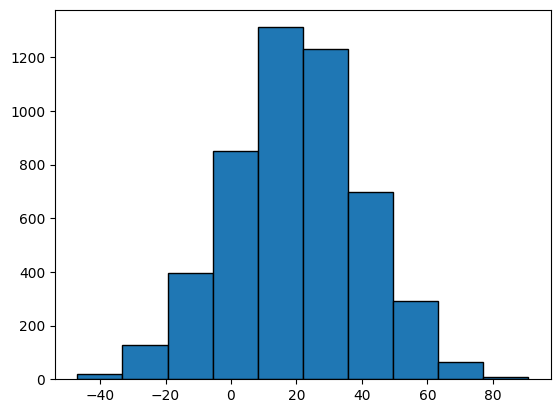

In [46]:
plt.hist(data, edgecolor='black')
plt.show()

### Metodo de Cuantiles 

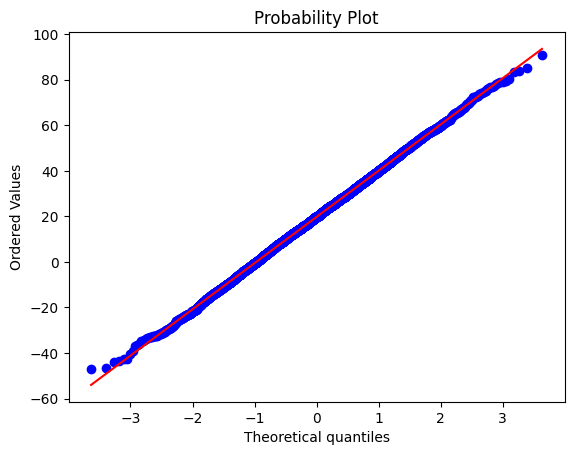

In [47]:
import pylab
import scipy.stats as stats
stats.probplot(data,dist='norm',plot=pylab)
pylab.show()

### Metodo de Pruebas 

Shapiro 

In [48]:
from scipy.stats import shapiro
_, p_value = shapiro(data)
print('p_value',p_value)
#Si p_value>0.05 ==> La dist es Normal

p_value 0.6410428075541892


# Anomalias en Datos

In [62]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


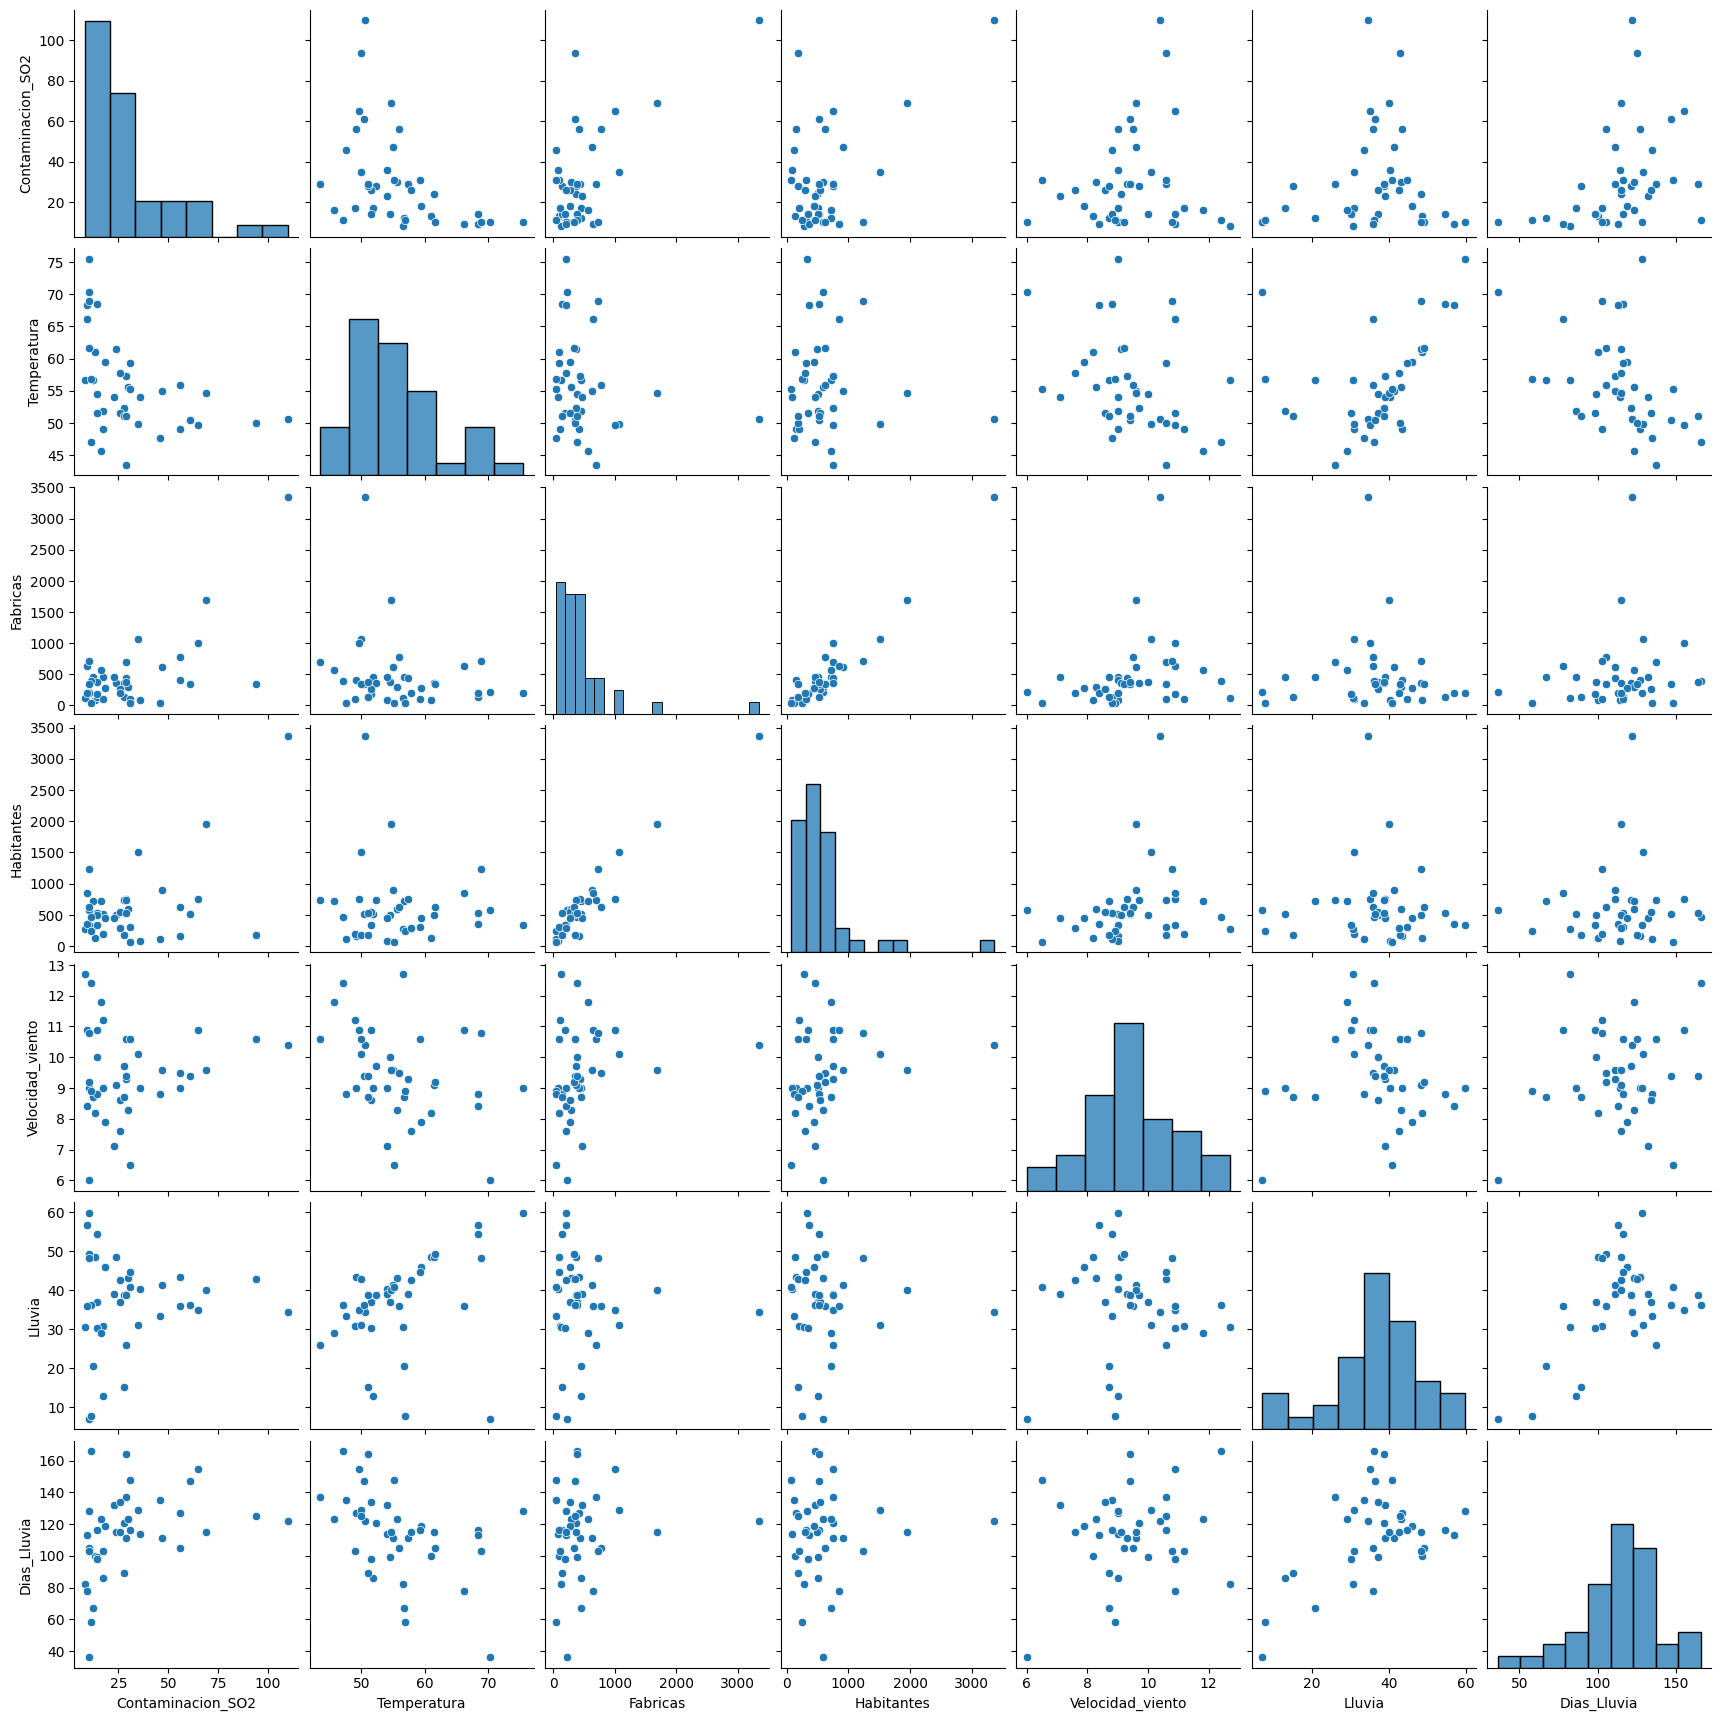

In [52]:
sns.pairplot(cont)

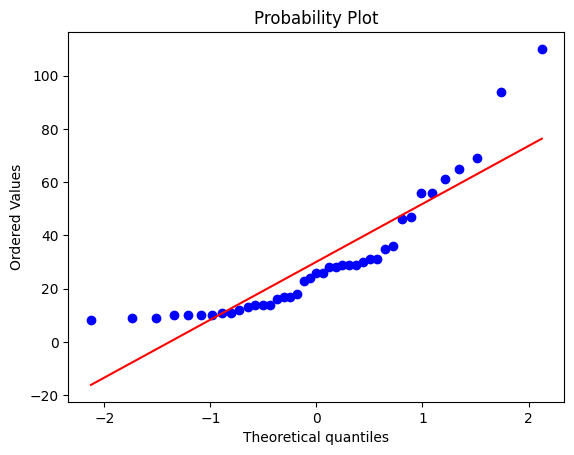

In [53]:
import scipy.stats as stats
import pylab
stats.probplot(cont.Contaminacion_SO2,dist='norm',plot=pylab)
pylab.show()

In [54]:
from scipy.stats import shapiro
_,p_value = shapiro(cont.Contaminacion_SO2)
print('p_value =', p_value)

p_value = 9.723376400158192e-06


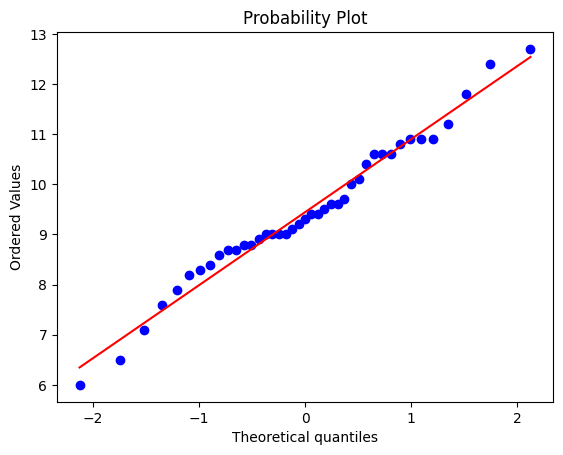

In [55]:
stats.probplot(cont.Velocidad_viento,dist='norm',plot=pylab)
pylab.show()

In [56]:
_,p_value = shapiro(cont.Velocidad_viento)
print('p_value =', p_value)

p_value = 0.6972579783041464


In [58]:
data = np.random.randn(50000) *20 + 20

In [59]:
def find_anomailes(data,cut=3):
  anomalies = []
  data_std = np.std(data)
  data_mean = np.mean(data)
  anomaly_cut = cut * data_std
  low_lim = data_mean - anomaly_cut
  upp_lim = data_mean + anomaly_cut
  #agregamos anomalias
  for d in data:
    if d>upp_lim or d < low_lim:
      anomalies.append(d)
  return anomalies

In [60]:
len(find_anomailes(data))

128

<Axes: >

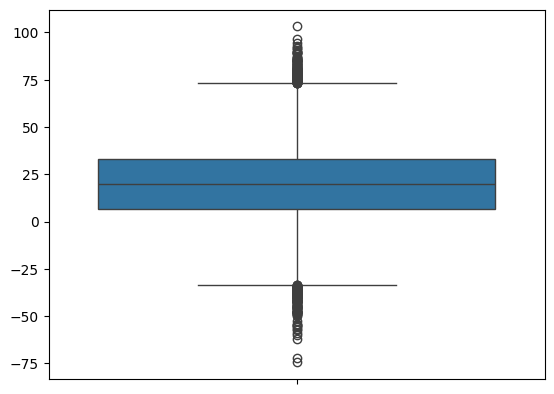

In [61]:
sns.boxplot(data)

dict

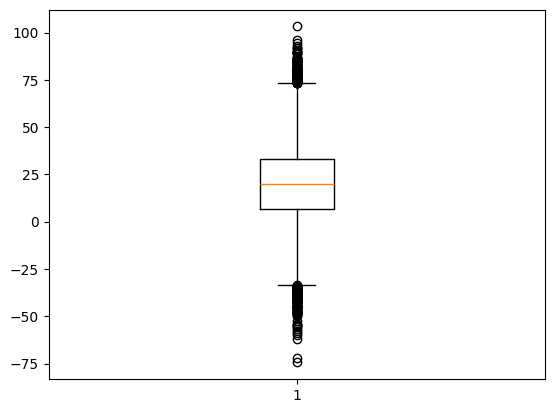

In [63]:
bp = plt.boxplot(x=data)
type(bp)

In [64]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [65]:
bp['fliers']

In [66]:
bp['fliers'][0].get_data()[1].shape

(344,)

# PCA 

Reduccion de dimension no supervidsada: Analisis de Componenetes Principales(PCA)

In [86]:
import nbformat
print(nbformat.__version__)

5.10.4


In [87]:
import plotly.io as pio
pio.renderers.default = 'browser'

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()


In [88]:
import numpy as np
import pandas as pd

In [89]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Separar los datos de Entrenamiento 

In [90]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
x_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Estandarizar

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
X_test_std = sc.transform(X_test) #No hay que volver a entrenar

Matriz de covarianzas y eigenvalores

In [92]:
import numpy as np
cov_mat = np.cov(x_train_std.T) #siempre se pasa transpuesta la matriz
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals: ', eigen_vals)

Eigenvals:  [4.76078723 2.83881284 1.2305337  1.0188158  0.77586469 0.60901505
 0.55430364 0.35985276 0.30016532 0.25078729 0.08580541 0.14621914
 0.17472818]


Grafica de eginvalores

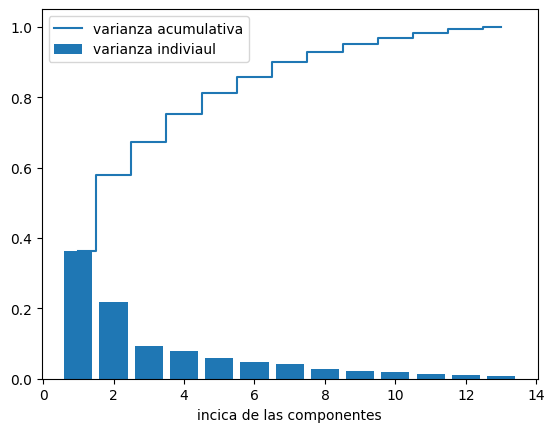

In [93]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, label='varianza indiviaul', align='center')
plt.step(range(1,14),cum_var_exp,where='mid',label='varianza acumulativa')
plt.xlabel('incica de las componentes')
plt.legend(loc='best')
plt.show()

In [94]:
# Lista de eginpares
eigen_par = [ ( np.abs(eigen_vals[i]),eigen_vecs[:,i] )
              for i in range(len(eigen_vals)) ]
# Ordenar de frroma desc:
eigen_par.sort(key=lambda k:k[0], reverse = True)
eigen_par

[(np.float64(4.760787234388956),
  array([-0.11005859,  0.23773537,  0.06018903,  0.29147644, -0.09710172,
         -0.39200806, -0.4283798 ,  0.30748273, -0.30710188,  0.10897389,
         -0.29031842, -0.37466674, -0.26605825])),
 (np.float64(2.8388128405756623),
  array([ 0.48369206,  0.19378194,  0.31233136, -0.1014273 ,  0.36880646,
          0.05668947,  0.00754341, -0.032432  ,  0.02359772,  0.49491333,
         -0.26283984, -0.17180601,  0.36907097])),
 (np.float64(1.2305337025775434),
  array([-0.07804028,  0.28923145,  0.60861818,  0.55635025, -0.01632264,
          0.20752047,  0.18311607,  0.0661029 ,  0.25917154, -0.15703176,
          0.00821918,  0.19886167, -0.13281021])),
 (np.float64(1.018815796558909),
  array([-0.06296875,  0.4868728 , -0.42809022, -0.05490204, -0.02443602,
          0.08732598,  0.04330558, -0.30985768,  0.41008522,  0.07091476,
         -0.46681926,  0.06319235, -0.2673798 ])),
 (np.float64(0.7758646893806121),
  array([ 0.21583827,  0.0886228 , -

In [96]:
# Dos ~60% de la varianza total
W = np.hstack( (eigen_par[0][1][:,np.newaxis], # np.newaxis que sea de segunda dimension
                eigen_par[1][1][:,np.newaxis]) )
print('Matriz W :\n', W)

Matriz W :
 [[-0.11005859  0.48369206]
 [ 0.23773537  0.19378194]
 [ 0.06018903  0.31233136]
 [ 0.29147644 -0.1014273 ]
 [-0.09710172  0.36880646]
 [-0.39200806  0.05668947]
 [-0.4283798   0.00754341]
 [ 0.30748273 -0.032432  ]
 [-0.30710188  0.02359772]
 [ 0.10897389  0.49491333]
 [-0.29031842 -0.26283984]
 [-0.37466674 -0.17180601]
 [-0.26605825  0.36907097]]


In [98]:
# Transformar una muestra 1x13 a 1x2
print('Original     :', x_train_std[0])
print('Proyectados :', x_train_std[0].dot(W))

Original     : [ 0.26152382  2.39895801 -0.0818022   0.7879714  -0.37969948 -0.84482746
 -1.400496    1.94084898 -0.04140203  1.12476808 -1.46457943 -1.55959286
  0.03922241]
Proyectados : [3.46542763 1.44752077]


In [99]:
# Transformar el conmjunto
x_train_pca = x_train_std.dot(W)
x_train_std.shape, x_train_pca.shape

((124, 13), (124, 2))

In [100]:
# Probar una regresion logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto', solver='liblinear')
lr.fit(x_train_pca, y_train)

c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

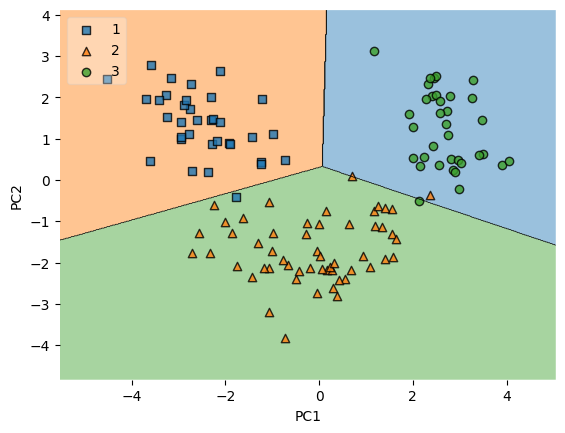

In [101]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train_pca,y_train,clf=lr, legend = 2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [102]:
# Metodo Boodcamp ==> PCA de sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Datos
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)

In [103]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#Entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3)
#Estandarizacion
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [104]:
#Modelos
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')
#Ajustar y transformar
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

c:\Users\ENRIQUE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

<Axes: >

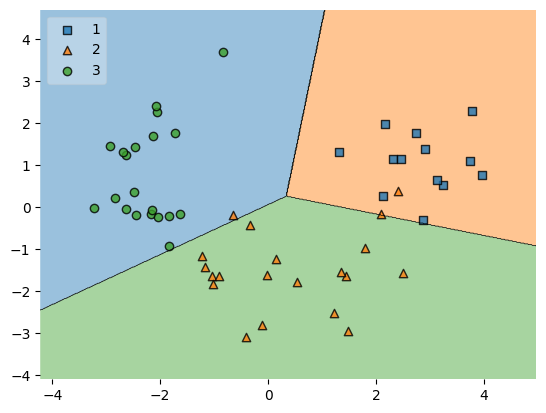

In [105]:
#Grafica del conjunto  de entrenamiento
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train, clf = lr, legend = 2)

<Axes: >

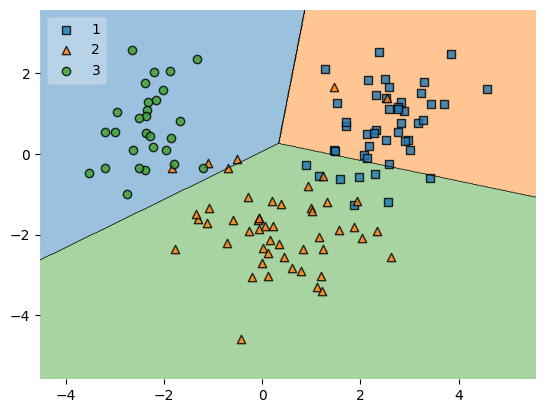

In [106]:
#Grafica de Rpuebas
plot_decision_regions(X_test_pca, y_test, clf = lr, legend = 2)

# LDA

Clasifica mejor para dator con clases 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Datos
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)

In [108]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#Entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3)
#Estandarizacion
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [109]:
# Modelos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
lda = LDA(n_components=2)
lr = LogisticRegression()
X_train_lda = lda.fit_transform(X_train_std, y_train) #Aqui se utiliza y_train por que es lo que aun aprende pero en test no se ocupa pues ya lo aprendio y solo es para probar
X_test_lda = lda.transform(X_test_std)
lr.fit(X_train_lda, y_train)

LogisticRegression()

<Axes: >

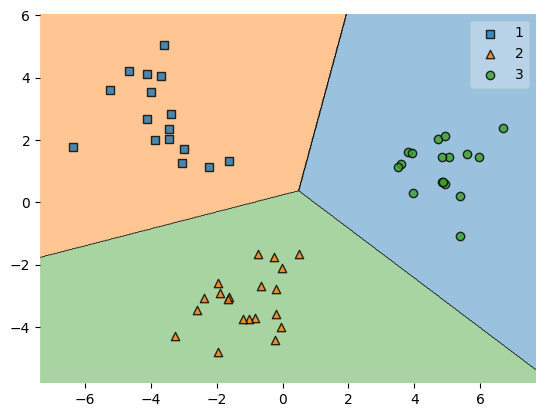

In [110]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda,y_train, clf = lr)

<Axes: >

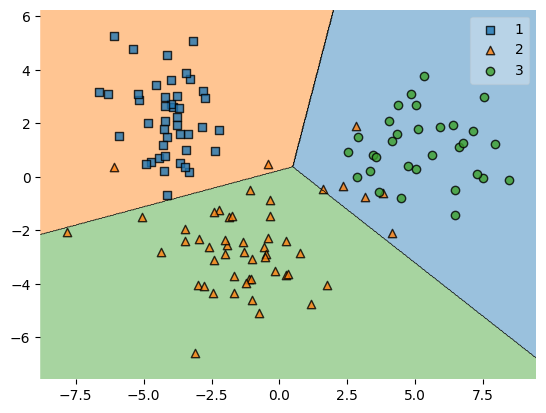

In [112]:
plot_decision_regions(X_test_lda,y_test, clf = lr)

# Kernel PCA

In [113]:
# Bibliotecas
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def rbf_kpca(X, gamma, n_components):
  """

  """
  #Obtener las distancias cuadradas de todas las parejas
  sq_dists = pdist(X, 'sqeuclidean')
  #Converitr la matriz
  mat_sq_dists = squareform(sq_dists)
  #Obtener matriz de nucleos
  K = np.exp(-gamma * mat_sq_dists)
  #Centar la matriz
  N = K.shape[0]
  one_n = np.ones((N,N)) / N # np.ones es los valores n los divides entre 1/n
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  # Obenter los eigenpares; scipy.linalg.eigh los devuelve ordenados (de manera ascendente)
  eigenvals , eigenvecs = eigh(K)
  eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1] #invierte los eigenvalores
  # Seleccionar los kprimeros eigenpares
  alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
  lambas = np.column_stack([eigenvals[i] for i in range(n_components)])
  return alphas, lambas

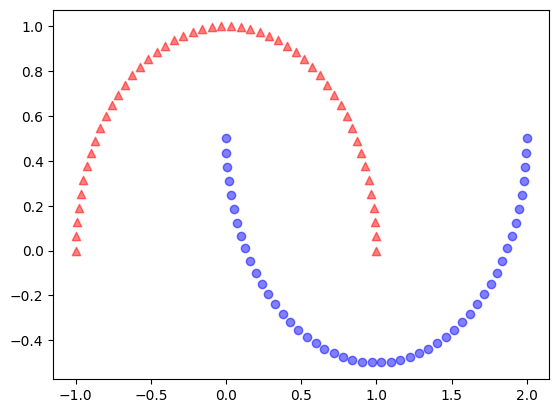

In [115]:
# Medias Lunas
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

In [116]:
#Con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

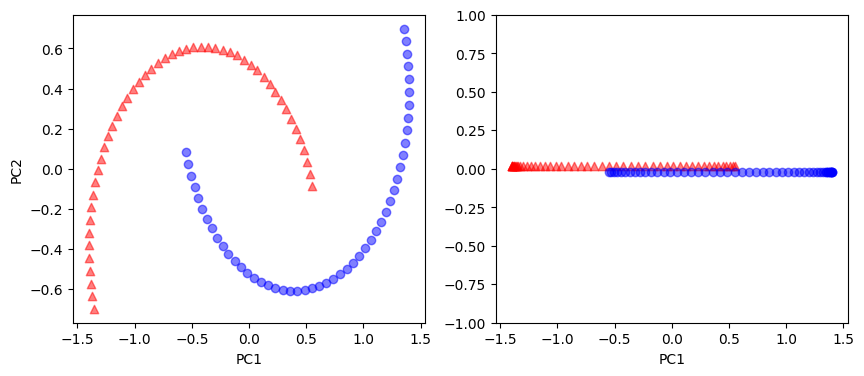

In [117]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

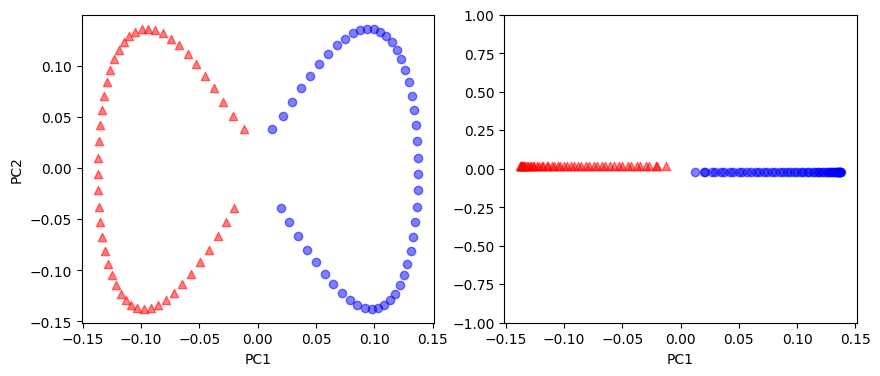

In [119]:
X_kpca,_ = rbf_kpca(X, gamma = 15, n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

Modo Bootcamp

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
from sklearn.decomposition import KernelPCA

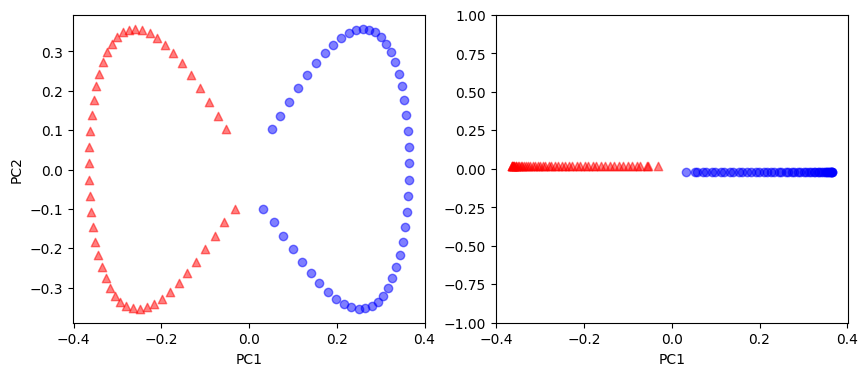

In [122]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15) #El agamma me dice que tan bien se ajusta, es mas que nada a preuba y error
X_kpca = kpca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

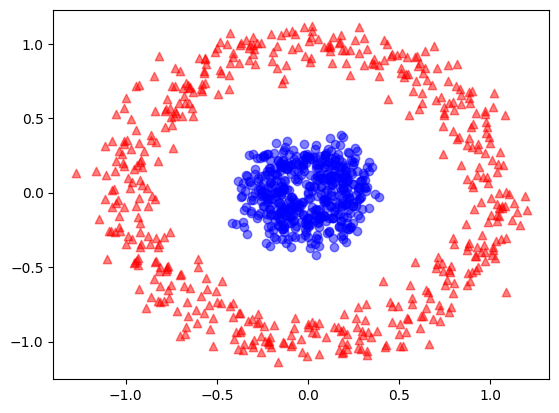

In [123]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

# Algoritmos Escalables y estadistica asociativa 

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [125]:
url = 'https://bit.ly/2cLzoxH'
brecha = pd.read_csv(url)
brecha.head(3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [126]:
brecha.tail(3)

,country,year,pop,continent,lifeExp,gdpPercap
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


<Axes: >

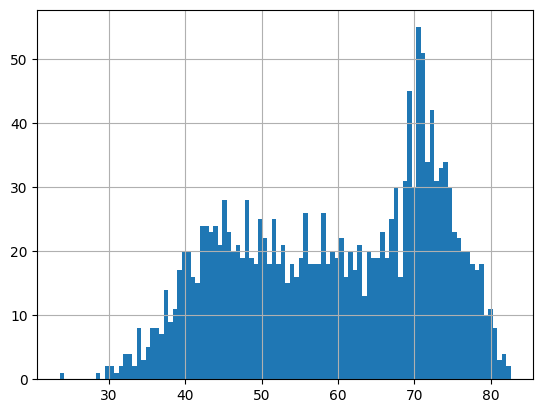

In [127]:
# Histrograma con pandas
brecha.lifeExp.hist(bins=100)

Text(0, 0.5, 'Freciencia')

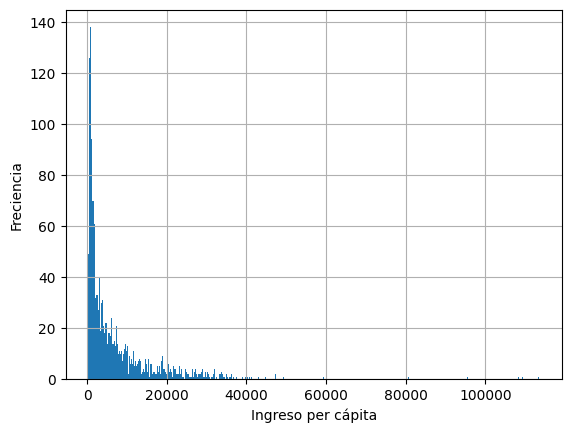

In [128]:
brecha.gdpPercap.hist(bins=500)
plt.xlabel("Ingreso per cápita")
plt.ylabel('Freciencia')

In [129]:
#Seaborn
import seaborn as sns

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_23388\4167861991.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='lifeExp', ylabel='Density'>

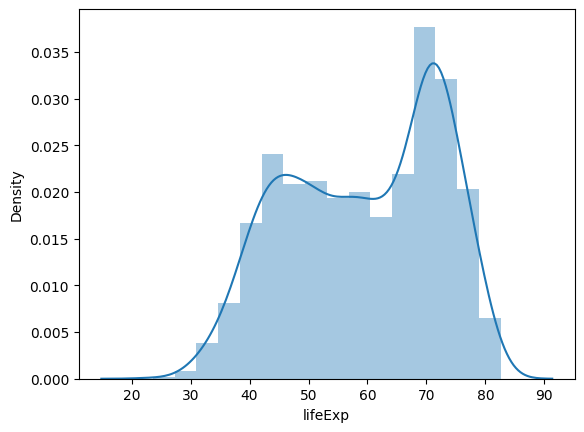

In [130]:
sns.distplot(brecha.lifeExp)

<Axes: xlabel='lifeExp', ylabel='Count'>

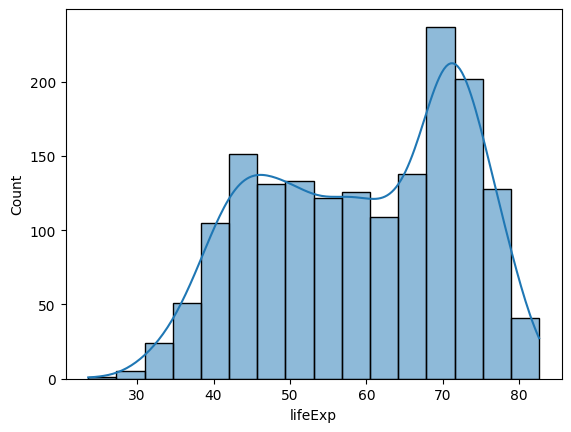

In [131]:
sns.histplot(brecha.lifeExp, kde = True)

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_23388\2937539456.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_23388\2937539456.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




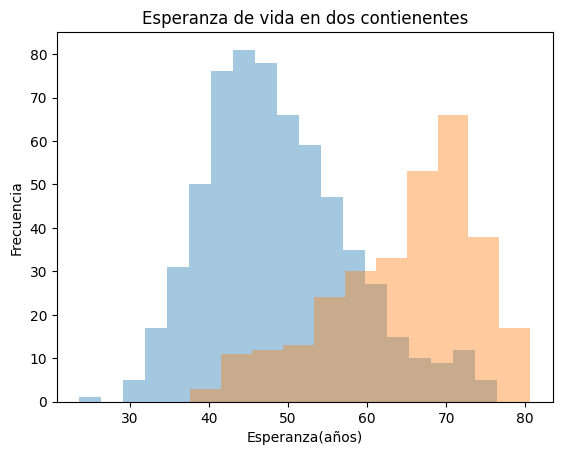

In [132]:
# Dos histogranas superpuestos
df = brecha[brecha.continent == 'Africa']
sns.distplot(df.lifeExp,kde=False, label='Africa')
df = brecha[brecha.continent=='Americas']
sns.distplot(df.lifeExp,kde=False, label='Ámerica')
plt.title('Esperanza de vida en dos contienentes')
plt.xlabel('Esperanza(años)')
plt.ylabel('Frecuencia')
plt.show()

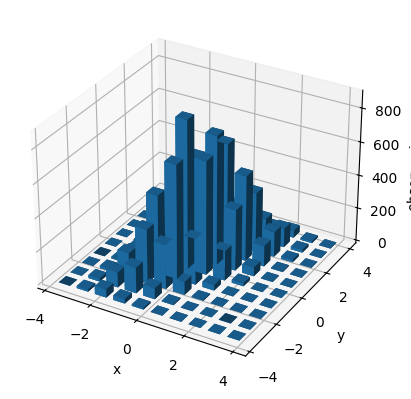

In [133]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean , cov , 10000).T
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# Histograma y contenedores bidimensionales
hist, xedges, yedges = np.histogram2d(x, y, bins = 10, range = [[-4, 4], [-4, 4]])
# Arreglos para las posiciones de las barras
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing = "ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Arreglos con la dimensión de las barras
dx = dy = 0.5*np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos , ypos , zpos , dx , dy, dz, zsort='average')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('observaciones')
plt.show()